<a href="https://colab.research.google.com/github/ASHIKAMOHAN/Sales_Forecasting/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:

file_path = '/content/drive/MyDrive/ML Data 3.csv'
sales_df = pd.read_csv(file_path)

print(sales_df)

          Rows No  Location ID    DealDate Currency Type  Type  Amount  \
0        28937647          140  04/01/2022      JMD    N     S   77000   
1        28937648          140  04/01/2022      XCD    N     S    1000   
2        28937649          140  04/01/2022      KRW    N     S  910000   
3        28937650          140  04/01/2022      EUR    N     S     705   
4        28937651          140  04/01/2022      TRY    N     S    3215   
...           ...          ...         ...      ...  ...   ...     ...   
8234155  46696722           38  30/04/2025      EUR    N     S     335   
8234156  46696723           38  30/04/2025      EUR    N     B     200   
8234157  46696724           38  30/04/2025      EUR    N     S     100   
8234158  46696725           38  30/04/2025      JPY    N     S   27000   
8234159  46696726          272  29/04/2025      EUR    N     S     340   

          Value  OriginationID  OrderTypeID  Reatils rate  
0        401.68              2            2      19

In [10]:
sales_df.info()
print("\nMissing values:\n", sales_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8234160 entries, 0 to 8234159
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Rows No        int64  
 1   Location ID    int64  
 2   DealDate       object 
 3   Currency       object 
 4   Type           object 
 5    Type          object 
 6   Amount         int64  
 7   Value          float64
 8   OriginationID  int64  
 9   OrderTypeID    int64  
 10  Reatils rate   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 691.0+ MB

Missing values:
 Rows No          0
Location ID      0
DealDate         0
Currency         0
Type             0
 Type            0
Amount           0
Value            0
OriginationID    0
OrderTypeID      0
Reatils rate     0
dtype: int64


In [11]:
sales_df.describe(include='all')


,Rows No,Location ID,DealDate,Currency,Type,Type,Amount,Value,OriginationID,OrderTypeID,Reatils rate
count,8.234160e+06,8.234160e+06,8234160,8234160,8234160,8234160,8.234160e+06,8.234160e+06,8.234160e+06,8.234160e+06,8.234160e+06
unique,NaN,NaN,1207,80,4,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,01/07/2023,EUR,N,S,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,12483,4843567,8225921,5847039,NaN,NaN,NaN,NaN,NaN
mean,3.796139e+07,1.090322e+02,NaN,NaN,NaN,NaN,3.354511e+04,3.150834e+02,2.883117e+00,1.327956e+00,1.444984e+02
std,5.114054e+06,6.180224e+01,NaN,NaN,NaN,NaN,6.437986e+05,5.100350e+02,6.474854e-01,7.160172e-01,1.802482e+03
min,2.893765e+07,5.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,2.700000e-03
25%,3.357164e+07,5.900000e+01,NaN,NaN,NaN,NaN,1.000000e+02,6.787000e+01,3.000000e+00,1.000000e+00,1.122700e+00
50%,3.802677e+07,1.060000e+02,NaN,NaN,NaN,NaN,2.850000e+02,1.702600e+02,3.000000e+00,1.000000e+00,1.206000e+00
75%,4.250761e+07,1.490000e+02,NaN,NaN,NaN,NaN,8.000000e+02,3.934900e+02,3.000000e+00,1.000000e+00,1.483300e+00


In [12]:
sales_df['DealDate'] = pd.to_datetime(sales_df['DealDate'], dayfirst=True)


In [14]:
print("Unique currencies:", sales_df['Currency'].nunique())
print("Top 5 currencies:\n", sales_df['Currency'].value_counts().head())

print("\nTransaction types:", sales_df['Type'].value_counts())
print("Order types:\n", sales_df['OrderTypeID'].value_counts())


Unique currencies: 80
Top 5 currencies:
 Currency
EUR    4843567
USD    1328549
TRY     356757
PLN     144063
AUD     126303
Name: count, dtype: int64

Transaction types: Type
N    8225921
T       6041
V       2194
Z          4
Name: count, dtype: int64
Order types:
 OrderTypeID
1    6732604
3    1189977
2     307125
4       4454
Name: count, dtype: int64


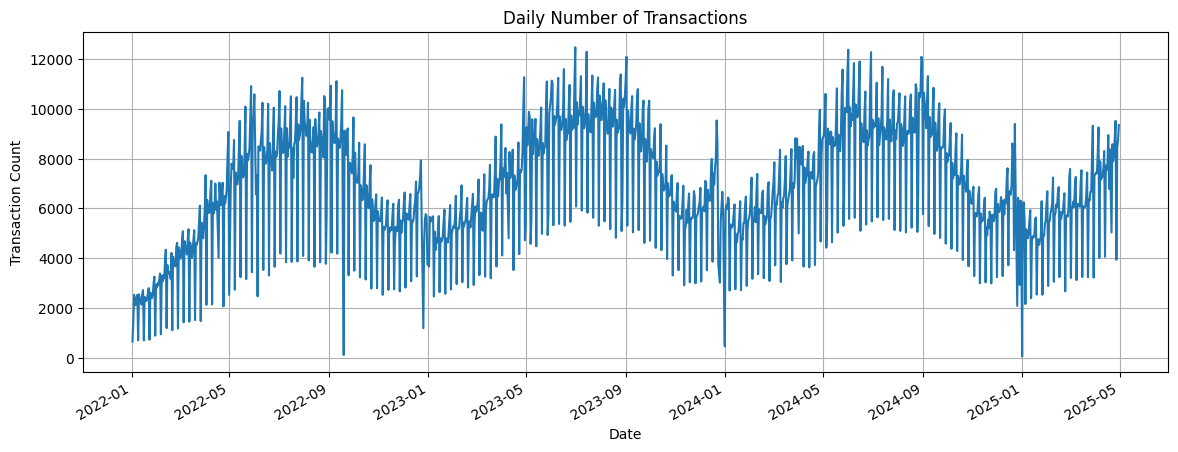

In [16]:
daily_trx = sales_df.groupby('DealDate').size()

plt.figure(figsize=(14, 5))
daily_trx.plot()
plt.title('Daily Number of Transactions')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.show()
